In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [12]:
W_true = 2
b_true = 0.5

In [13]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

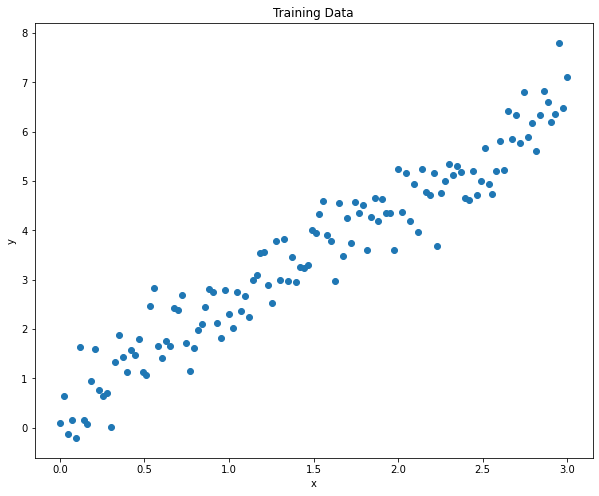

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title("Training Data")
plt.show()

In [15]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name="W")
        self.bias = tf.Variable(np.random.randn(), name = "b")

    def __call__(self, x):
        return self.weight * x + self.bias

In [16]:
def loss(y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))

In [17]:
def train(linear_model, x, y, lr = 0.01):

    with tf.GradientTape() as tape:

        y_pred = linear_model(x)

        current_loss = loss(y, y_pred)
    
    d_weight, d_bias = tape.gradient(current_loss,
                                     [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [18]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [19]:
for epoch_count in range(epochs):

    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, lr = lr)

    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 49.82479476928711
Epoch count 1: Loss value: 1.4009732007980347
Epoch count 2: Loss value: 0.3879617154598236
Epoch count 3: Loss value: 0.35364508628845215
Epoch count 4: Loss value: 0.34105849266052246
Epoch count 5: Loss value: 0.33030104637145996
Epoch count 6: Loss value: 0.32080215215682983
Epoch count 7: Loss value: 0.3124079704284668
Epoch count 8: Loss value: 0.3049900531768799
Epoch count 9: Loss value: 0.29843470454216003


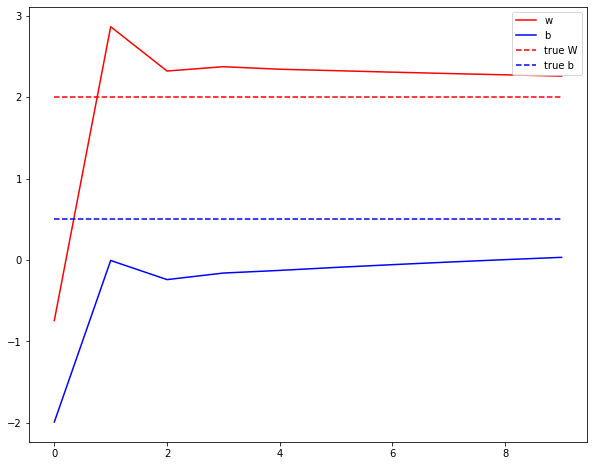

In [20]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['w', 'b', 'true W', 'true b'])